In [1]:
# The primary purpose of this script is to find rows of circles in an image
# and upload them as annotation to girder.

# It contains an example of embedding a viewer in a notebook

from __future__ import division, print_function
from ipywidgets import interact, interactive, fixed, interact_manual    
import ipywidgets as widgets
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy as sp
from scipy import ndimage
from IPython.core.debugger import set_trace
import cv2
import sys
from pprint import pprint
from random import randint
import nuclei.foci as foci
import nuclei
import nuclei.girder as g
import nuclei.girder.time_lapse_data as reader

# I copied this from elipsesAroundNuclei-Tracks-FociCount
# I want to only test the code to find circles on all images in girder.
plt.rcParams['image.cmap'] = 'gist_earth'
matplotlib.rcParams['figure.figsize'] = (11.0, 11.0)


import sys
sys.version_info


# Input Parameters
czi_folder_id = "5ae21cc31fbb9052b6669e58"
series_idx = 7


    


In [5]:
"""
# Get the image from girder.
import girder_client

gc = girder_client.GirderClient(apiUrl= GIRDER_URL+'/api/v1')
gc.authenticate(GIRDER_USERNAME, apiKey=GIRDER_KEY)
"""
source = reader.time_lapse_data()
# 073117 BT549_Sv40_Bt549_SV40 NLS GFP 53BP1 mcherry_2017_07_31__18_31_54series000
source.load(czi_folder_id)
print("series: %d"%source.get_number_of_series())
print("time steps in series 1: %d"%source.get_series_length(1))
im, item_obj = source.get_image(series_idx,10)

item_id = item_obj['_id']

# Compute circles and put them into into girder.
gray_image = im[:,:,0]
circles = cv2.HoughCircles(gray_image,cv2.HOUGH_GRADIENT,1,50, \
                           param1=50,param2=30,minRadius=50,maxRadius=100)
pprint(circles)

print(circles is None)

g.upload_circle_annotation(item_id, circles)

# Link to the image on girder
url = 'https://images.slide-atlas.org/#item/%s'%item_id
from IPython.core.display import display, HTML
display(HTML('<a href="%s">Girder Item</a>'%url))

# Embed the webpage in a frame.  We sould find a solution to only include the viewer.
import IPython
iframe = '<iframe src="' + url + '" width=700 height=700></iframe>'
IPython.display.HTML(iframe)




series: 28
time steps in series 1: 99
array([[[ 480.5, 1058.5,   66.9],
        [ 759.5,  625.5,   67.2],
        [ 341.5, 1055.5,   68.2],
        [1602.5, 1465.5,   64.3],
        [ 339.5,  631.5,   67.4],
        [1603.5,  617.5,   68. ],
        [1463.5,  615.5,   63.9],
        [ 901.5,  622.5,   65.7],
        [ 485.5,  629.5,   66.3],
        [1747.5,  611.5,   70.2],
        [ 331.5, 1483.5,   66.9],
        [1883.5,  618.5,   63.9],
        [1182.5,  620.5,   68.3],
        [1881.5, 1041.5,   65.9],
        [1879.5, 1463.5,   63.9],
        [ 753.5, 1478.5,   66.1],
        [1460.5, 1045.5,   68.3],
        [ 611.5, 1477.5,   69.1],
        [ 618.5, 1058.5,   63.7],
        [ 758.5, 1058.5,   70.2],
        [ 201.5, 1066.5,   61.9],
        [1322.5, 1042.5,   67.1],
        [1736.5, 1459.5,   56.2],
        [1029.5, 1472.5,   72.3],
        [ 466.5, 1477.5,   71.5],
        [ 628.5,  620.5,   70.4],
        [1453.5, 1467.5,   65.5],
        [1310.5, 1465.5,   69.6],
        [1

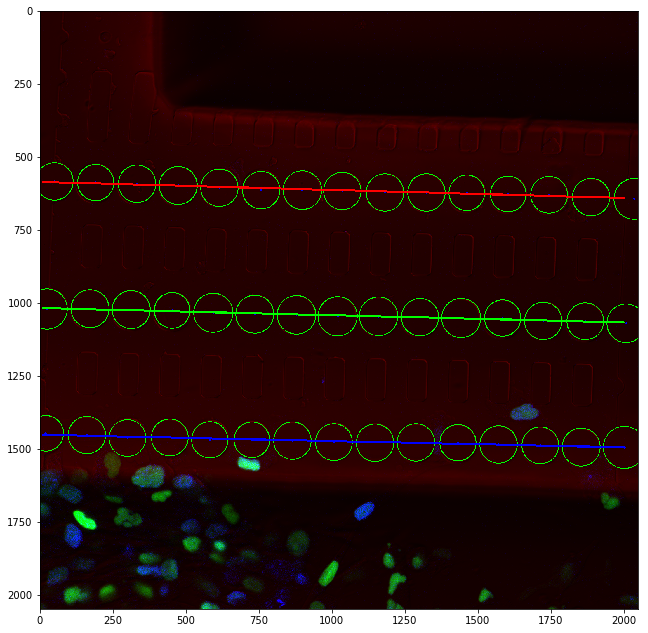

In [3]:
# now do it the old fashion way.

gray_image = im[:,:,0]
#gray_image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

#plt.imshow(gray_image)

circles = cv2.HoughCircles(gray_image,cv2.HOUGH_GRADIENT,1,50,param1=50,param2=30,minRadius=50,maxRadius=100)
for i in circles[0]:
    # draw the outer circle
    cv2.circle(im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(im,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(im)

row1x = []
row2x = []
row3x = []
row1y = []
row2y = []
row3y = []
row1r = []
row2r = []
row3r = []

row1x.append(circles[0][0][0])
row1y.append(circles[0][0][1])
row1r.append(circles[0][0][2])



for circle in circles[0]:
    if circle[1] < row1y[0]+row1r[0]+30 and circle[1] > row1y[0]-row1r[0]-30:
        row1x.append(circle[0])
        row1y.append(circle[1])
        row1r.append(circle[2])
    elif (row2x != [] and circle[1] < row2y[0]+row2r[0]+30 and circle[1] > row2y[0]-row2r[0]-30) or row2x == []:
        row2x.append(circle[0])
        row2y.append(circle[1])
        row2r.append(circle[2])
    else:
        row3x.append(circle[0])
        row3y.append(circle[1])
        row3r.append(circle[2])
            
if row1y[1] < row2y[1] and row1y[1] < row3y[1]:
    row1 = np.polyfit(row1x, row1y,1)
    if row2y[1] < row3y[1]:
        row2 = np.polyfit(row2x, row2y,1)
        row3 = np.polyfit(row3x, row3y,1)
    else :
        row3 = np.polyfit(row2x, row2y,1)
        row2 = np.polyfit(row3x, row3y,1)
elif row2y[1] < row3y[1] and row2y[1] < row1y[1]:
    row1 = np.polyfit(row2x, row2y,1)
    if row1y[1] < row3y[1]:
        row2 = np.polyfit(row1x, row1y,1)
        row3 = np.polyfit(row3x, row3y,1)
    else :
        row3 = np.polyfit(row1x, row1y,1)
        row2 = np.polyfit(row3x, row3y,1)
else :
    row1 = np.polyfit(row3x, row3y,1)
    if row1y[1] < row2y[1]:
        row2 = np.polyfit(row1x, row1y,1)
        row3 = np.polyfit(row2x, row2y,1)
    else :
        row3 = np.polyfit(row1x, row1y,1)
        row2 = np.polyfit(row2x, row2y,1)


cv2.line(im,(10,int(10*row1[0]+row1[1])),(2000,int(2000*row1[0]+row1[1])),(255,0,0),5)
cv2.line(im,(10,int(10*row2[0]+row2[1])),(2000,int(2000*row2[0]+row2[1])),(0,255,0),5)
cv2.line(im,(10,int(10*row3[0]+row3[1])),(2000,int(2000*row3[0]+row3[1])),(0,0,255),5)

plt.imshow(im)

In [97]:
print("czi_folder_id = '%s'"%czi_folder_id)
print("series_idx = %d"% series_idx)
print("row1 = %s"%row1)
print("row2 = %s"%row2)
print("row3 = %s"%row3)
print("rows = [row1, row2, row3]")



czi_folder_id = 5ada43f41fbb9005ff7260eb
series_idx = 7
row1 = [  2.80454208e-02   5.84824670e+02]
row2 = [  2.46209269e-02   1.01727575e+03]
row3 = [  2.16815811e-02   1.45159637e+03]
rows = [row1, row2, row3]
